In [18]:
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import itertools

In [19]:
RESULT_URL = "https://huggingface.co/henryscheible/experiment_results/raw/main/results_2023-01-09%2003%3A23%3A40.623016.json"

In [20]:
data = json.loads(requests.get(RESULT_URL).text)

In [21]:
data.keys()

dict_keys(['stereoset_binary_bert_classifieronly'])

In [22]:
checkpoints = list(data.keys())
suffixes = ["250", "500", "750", "1000"]

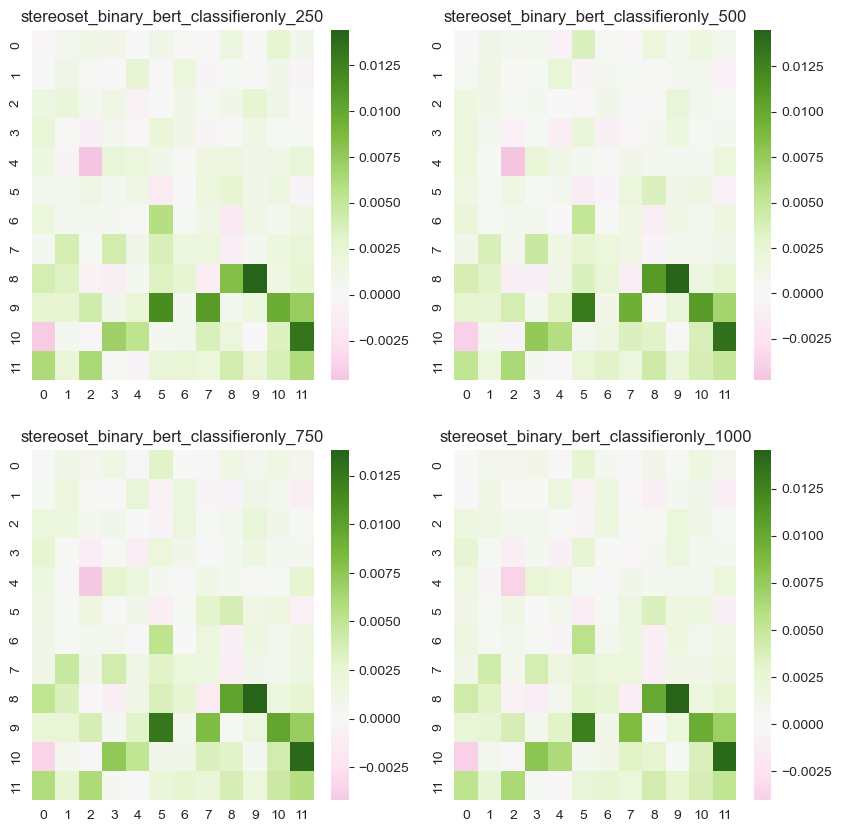

In [23]:
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for i, checkpoint in enumerate(checkpoints):
    for j, suffix in enumerate(suffixes):
        ax = fig.add_subplot(2,2,i+j+1)
        ax.set_title(f"{checkpoint}_{suffix}")
        sns.heatmap(np.array(data[checkpoint][suffix]["contribs"]).reshape(12, 12), ax=ax, cmap="PiYG", center=0)
plt.show()

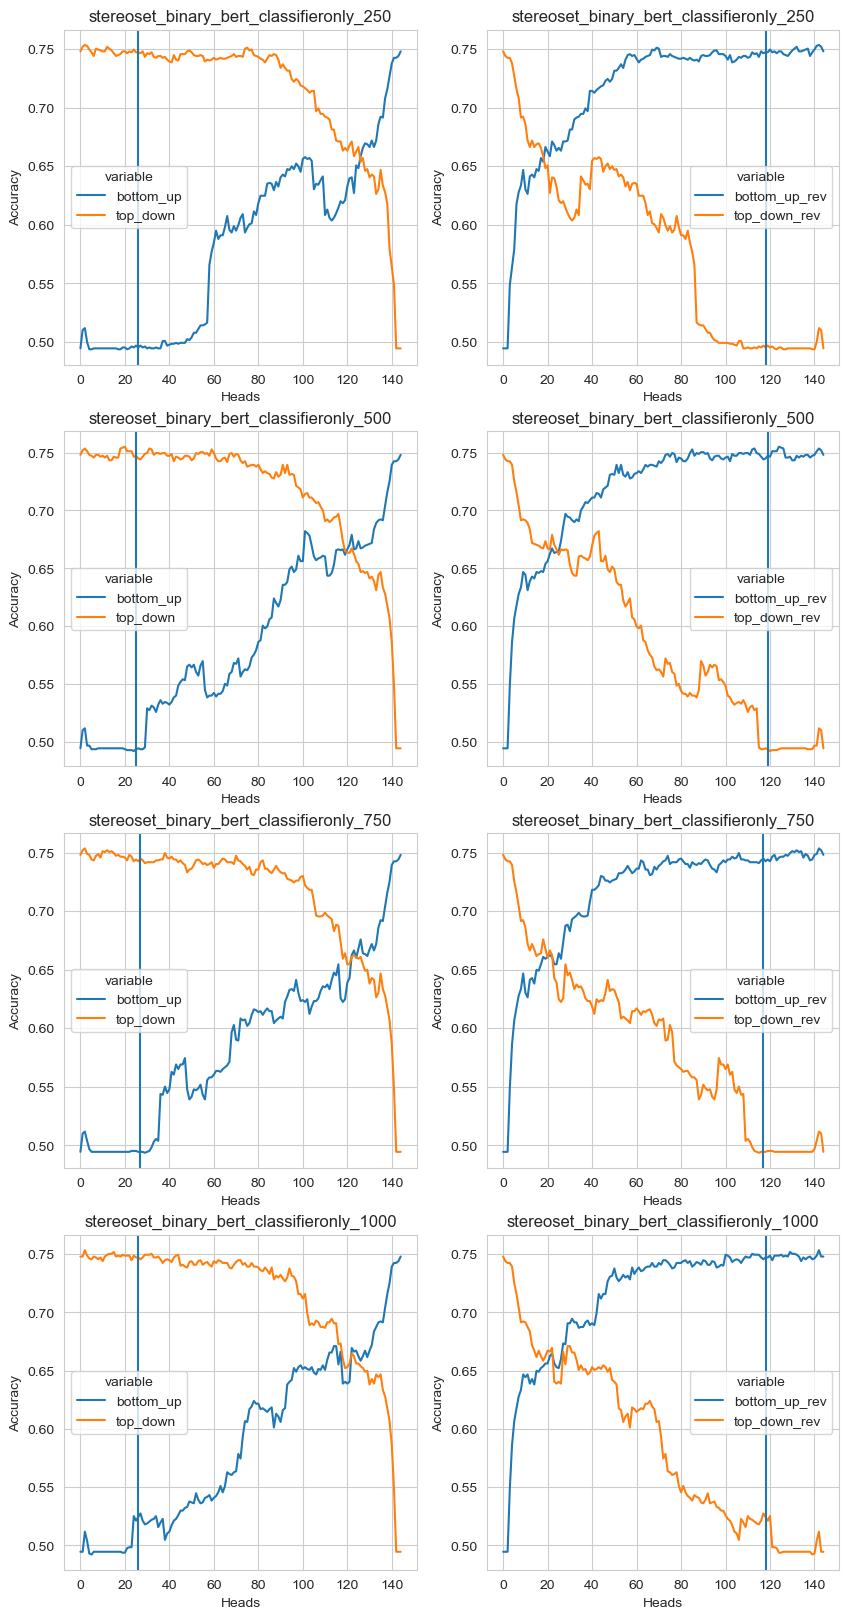

In [29]:
fig = plt.figure(figsize=(10, 20))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for i, checkpoint in enumerate(checkpoints):
    for j, suffix in enumerate(suffixes):
        ax = fig.add_subplot(4, 2, 2*(i+j) + 1)
        df = pd.DataFrame({
            'heads': np.arange(145),
            'bottom_up': data[checkpoint][suffix]["bottom_up_results"],
            'top_down': data[checkpoint][suffix]["top_down_results"],
        })
        contribs = np.asarray(data[checkpoint][suffix]["contribs"])
        vline = (contribs < 0).sum()
        ax.set_title(f"{checkpoint}_{suffix}")
        sns.lineplot(x='heads', y='value', hue='variable',
                    data=pd.melt(df, ['heads']), ax=ax)
        ax.set(xlabel="Heads", ylabel="Accuracy")
        ax.axvline(vline, 0, 1)

        ax = fig.add_subplot(4, 2, 2*(i+j)+2)
        df = pd.DataFrame({
            'heads': np.arange(145),
            'bottom_up_rev': data[checkpoint][suffix]["bottom_up_rev_results"],
            'top_down_rev': data[checkpoint][suffix]["top_down_rev_results"],
        })
        contribs = np.asarray(data[checkpoint][suffix]["contribs"])
        vline = (contribs > 0).sum()
        ax.set_title(f"{checkpoint}_{suffix}")
        sns.lineplot(x='heads', y='value', hue='variable',
                    data=pd.melt(df, ['heads']), ax=ax)
        ax.set(xlabel="Heads", ylabel="Accuracy")
        ax.axvline(vline, 0, 1)

plt.show()